# 2018-05-03 - MotionClouds avec CHAMP
Une module qui contient les fonctions pour générer les MotionClouds selon plusieurs difficultés est dérivé du notebook 2018-04-24_02. Par exemple :

In [1]:
import CHAMP.MC as MotionClouds
from CHAMP.DataLoader import LoadData, LoadCloudsDB


#depuis le module
MotionClouds.generate_easy_MC(N_theta = 500, N_theta_test = 25)

#depuis DataLoader, avec Download le paramètre pour générer ou non
LoadData('Clouds', 'clouds_easy', download = True, clouds_diff = 'easy')

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.8045554077798057e+177, 3.948206681825001e+177]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.129357376051284e+175, 8.28423649596414e+175]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.711766057932075e+174, 1.856499164950102e+174]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.868841639835465e+172, 2.8876965884570957e+172]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.818719003117268e+124, 3.7357818434319067e+124]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.8405191726925942e+123, 1.7797745199712695e+123]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9.378773721473003e+121, 1.1085851123845512e+122]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-7.076552673767149e+120, 6.931145291783176e+120]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaco

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.007080627013266e+87, 1.1540130463369964e+87]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.650627365168664e+86, 1.4370472702999298e+86]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.0984118852761568e+85, 2.010876664054205e+85]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.5472706826082426e+84, 3.4924941425395566e+84]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/li

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9.518645028925123e+61, 7.737762288167328e+61]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.134113798404883e+61, 1.9444312206419602e+61]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.3741908795498e+60, 4.7892882459514374e+60]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.19705524586363e+60, 9.951267910318107e+59]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/pyth

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.163121938368049e+43, 2.506641263586538e+43]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.656577289316476e+42, 8.303817674997286e+42]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.136875218296696e+42, 3.0307287039512836e+42]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.2025663965764985e+42, 1.0387204278485427e+42]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.771569026145795e+29, 7.504941458231106e+29]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.144167819300141e+29, 4.559800216832157e+29]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.9112619528141976e+29, 1.821025181034971e+29]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.0354505754275307e+29, 8.832348886831054e+28]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/p

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.0289309064547585e+20, 9.23373172476463e+19]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-6.277068722039254e+19, 5.538316628203251e+19]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.011714556739643e+19, 3.914788130941803e+19]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.2504863457047314e+19, 2.075703834759969e+19]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/py

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-55666407569186.18, 56649085353776.516]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-39428170039325.85, 35992949510959.516]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-24828160720856.29, 30917431521241.504]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-18893389482610.855, 19487715455720.34]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-891051029.2756925, 843596578.7918756]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-576855998.8328803, 603528373.2921419]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-567954894.1721774, 513115681.9875045]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-417722225.0293591, 476780245.6125052]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/cor

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-382167.0824082449, 424639.5499297026]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-360476.2384443707, 327904.02759786235]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-288771.23111649306, 257739.3848220365]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-263720.42932540533, 254824.7469614963]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2312.0364980481954, 2518.4642534037334]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1488.9633961492973, 1551.5969741495023]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1635.3816777075697, 1471.2023011392348]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1572.0828437573055, 1468.090529676619]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imag

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-29.372662558042407, 31.295835831570052]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-30.60564689880913, 31.822409839413037]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-26.49997504317912, 32.35066234742438]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-28.423815894718768, 24.454085801916086]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imagei

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.8192698502674145, 2.771277668918069]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.6235344604252253, 2.622738229940235]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.6720982323859097, 2.567013920011245]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.832461304186365, 2.4313015071760633]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.4663959258349036, 0.48018383974248846]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.44180586645504677, 0.49099125921834497]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.4577944451222167, 0.46765116991779293]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.4669166808441677, 0.4988799356448033]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.4222399704128153e+151, 5.437171616229023e+151]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.7783418352520657e+150, 1.8267916835650375e+150]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.248606987735253e+148, 5.692733425420528e+148]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.8003963755144558e+147, 1.6472117136859964e+147]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anac

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.5653072246539577e+107, 1.982129172285389e+107]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.4782192545471413e+106, 1.6154226209812955e+106]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.7882726635578923e+105, 1.313964253645686e+105]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.3360083511050985e+104, 1.2325086604477344e+104]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/ana

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-7.984743001318541e+74, 7.005088543101595e+74]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.465660875752535e+74, 1.475420188721444e+74]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.3504989752879105e+73, 2.336595707515412e+73]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.379951409896567e+72, 5.23805796464474e+72]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/pyt

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.082637679489241e+52, 4.251599443455219e+52]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.4404931342104227e+52, 1.203684189074572e+52]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.152446982912682e+51, 3.519368443700393e+51]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.1246066250959836e+51, 9.238003807302628e+50]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/p

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.9148310189116664e+36, 2.280140355292345e+36]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.0906956953062302e+36, 1.1428656917538623e+36]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.6910436067013125e+35, 4.824199294110066e+35]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.9957243550204677e+35, 1.989114518450137e+35]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/li

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.0127975594190177e+25, 1.9476583635663324e+25]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.406939585514633e+24, 8.678498949628155e+24]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.500842820784988e+24, 5.938837646781077e+24]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.781966066415198e+24, 2.6534707329716173e+24]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.321919873935799e+17, 3.555214367906458e+17]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.9345052324071648e+17, 2.2090760730495123e+17]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.4699294453154298e+17, 1.3478064318253472e+17]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.26757566368446e+16, 1.0422770098476498e+17]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-372713129452.5159, 299755426075.85596]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-253168518067.43286, 225940318014.84863]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-165108844998.2679, 168587230784.33374]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-124077087347.59634, 108261500195.01892]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/image

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-6730740.017682869, 6333877.731804463]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5276338.229672547, 5372662.587199992]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4509756.996261925, 5182927.141071863]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3651673.452949693, 3521066.810038817]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/cor

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-12832.500314234163, 13934.044230774183]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-13453.377021068594, 13560.781818894502]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-10425.985185048034, 12113.423469935973]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-10940.95329396959, 9595.280187707805]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/image

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-148.42366299767536, 140.48212561431663]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-147.59157626552684, 141.1775620625338]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-124.27544449909686, 124.23864469852316]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-115.17047033031741, 121.92313704223574]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imag

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.9152887946518415, 6.99492127361632]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.43747520287945, 5.610561221323104]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.347892943390616, 5.192027369940879]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.909553182749527, 4.8307450623680595]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/cor

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.6751235453509119, 0.7285509323095356]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.6104562293390401, 0.619193498590852]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.6931809193437531, 0.6109568904748729]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.60210035207133, 0.5676325980272592]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imagei

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.604101335050916e+159, 2.652175957845358e+159]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-7.592778773222317e+157, 7.291813659294541e+157]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.8310521193137926e+156, 2.0631474308805604e+156]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.012965628282309e+154, 6.255805823832577e+154]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anacond

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.452849414935793e+108, 2.2300519534644442e+108]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.929791952914929e+107, 2.1415813859490275e+107]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.6061287626513322e+106, 1.4415310072739884e+106]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.451708383604359e+105, 1.4746721025877274e+105]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anac

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.625728221361113e+73, 2.5596589866323876e+73]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.368644772708846e+72, 5.306090292816703e+72]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9.330140255070401e+71, 9.473563932689362e+71]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.7709907301709511e+71, 1.7227123622597047e+71]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.4567852591547867e+49, 3.183007802369703e+49]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.2412582278154476e+49, 1.1225429966168327e+49]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.388459835044998e+48, 3.6088492841448094e+48]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.3119477416090468e+48, 1.2530924027302234e+48]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/l

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.4169728463347488e+33, 1.4453448598228435e+33]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-7.7042151141456e+32, 7.131904982940117e+32]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.480088344304876e+32, 3.331713282273981e+32]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.5259944178660968e+32, 1.4054467320198861e+32]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/p

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.056083617566645e+22, 1.198018977806536e+22]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.293867425035166e+21, 5.937235448191768e+21]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.9795201802669885e+21, 3.250811492908886e+21]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.7800515985924162e+21, 2.0046754907042643e+21]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-265683281627076.2, 256216242393542.0]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-178940664968206.44, 217435509660607.38]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-114298753253078.38, 121249503687909.1]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-84377809938806.77, 76272587523419.06]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1598585312.6403468, 1731359725.1438131]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1025238780.4905083, 1117442951.6760592]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-958378880.4341742, 974466518.5537205]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-725824480.6125484, 693256413.6674291]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-417542.707801831, 397999.1889488973]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-424749.6983290379, 419849.32422369556]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-272861.6331360431, 292563.53219736693]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-269264.9008873375, 280978.8205371018]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/co

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1743.9197376197953, 1898.9969382916568]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1449.3509329889657, 1386.2519628372322]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1457.1932583826542, 1358.7800414685817]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1227.016611998777, 1489.0831967949257]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imag

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-39.103336263165474, 51.1114391792963]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-37.55239938662619, 36.21145859834708]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-31.331534053135833, 38.424782778214464]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-33.25838912526568, 31.30036318682156]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/c

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.2786747552851256, 3.2240318002902635]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.966470539346, 2.6538034177996908]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.9973604386749773, 2.772152520285335]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.494654334360762, 2.5101979363605285]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/c

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.5101777921504563, 0.5317353124683766]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.497143569107536, 0.5726841071218604]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.5459412412760486, 0.6020707099090724]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.4821537546248372, 0.5013771645941564]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imag

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.773843089720547e+150, 1.8921613405945306e+150]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.916735212577268e+148, 6.370892707650341e+148]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.384730712850482e+147, 1.9423049966871677e+147]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.737956319008742e+145, 7.794670429844537e+145]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anacond

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.4510211654194106e+105, 1.4662525569476278e+105]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.0971153994655682e+104, 1.5187083847046887e+104]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.3869536718064974e+103, 1.346223744400999e+103]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.0872698205761962e+102, 1.0617671375424743e+102]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/an

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.43742775725221e+73, 2.7525638516062013e+73]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.854008783567041e+72, 5.285591482233459e+72]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.0391016243998566e+72, 9.787606734811495e+71]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.6144076204128187e+71, 1.759735503681504e+71]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/p

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.191091801017983e+51, 1.3276841914073413e+51]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.03247136814399e+50, 3.0592306652562952e+50]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.0099167958985464e+50, 1.2820486831298516e+50]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.586869754191473e+49, 4.4681423688166713e+49]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.9240328388005206e+35, 2.1579061113055714e+35]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-7.236721849895545e+34, 7.841783135019559e+34]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.7985620474221346e+34, 3.7095793491856017e+34]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.1582093771642493e+34, 1.706567896490536e+34]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/li

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.6083724084383018e+24, 1.400648875563132e+24]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9.243106848633954e+23, 8.736487110671177e+23]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.7706451392653734e+23, 5.003785161494772e+23]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.261884241987936e+23, 4.093558459399052e+23]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/p

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.2298118806003418e+16, 1.1315581724155992e+16]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-6878815204680944.0, 7182142585193208.0]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4901698718123660.0, 4679996054908802.0]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3644077546893012.0, 3473852314081343.0]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-pack

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-26257529435.483795, 26521927494.801888]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-22653220739.495876, 18699314738.172874]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-13843141114.981106, 17476449948.670433]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-12848550989.267395, 12742359415.372398]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/ima

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3517130.610619604, 3072577.2652354073]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2731258.667941863, 2514088.8080352666]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2202431.6430134606, 1882254.5388884346]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1616439.8916338468, 1750419.5755095433]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/image

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5978.396673063611, 6127.413888979785]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5407.494773824239, 5376.901921534234]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4690.8510714983595, 4963.768305519534]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4333.475669154351, 3847.751348468854]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/co

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-92.23242326412957, 104.21617314232441]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-79.27892875848457, 92.69051475718025]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-76.83335812144634, 82.90429444970769]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-76.50866819276075, 90.84329536587263]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/co

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.50108708671703, 5.316479550716428]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.286567979757064, 5.617000856801814]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.637780910669948, 4.948022544039494]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.939185019452731, 4.849531210403869]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.726235341753033, 0.7943555372135048]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.7851104307338297, 0.8014322295646032]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.7279511862578603, 0.717474535609536]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.7374537218880175, 0.6977440639923573]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/image

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.6635326492354448e+63, 1.73765593225985e+63]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.458923392036027e+51, 1.9114515050961593e+51]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.8644424183897156e+41, 2.3983146807364457e+41]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.9913057355660194e+33, 2.5089438517460593e+33]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/li

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4513.3448574438535, 4551.0860684172885]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-487.7972626024558, 426.3863226023609]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-58.18291225205485, 65.92770899732628]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-12.025962231535523, 10.736485132977002]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.691436351275091e+63, 1.3590484032635795e+63]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.4635652894722658e+51, 1.614623432029278e+51]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.3289863833786588e+41, 2.2906805155625107e+41]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.5710250764888412e+33, 2.096411467481021e+33]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/li

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-6.392510157148495e+154, 5.250887706625477e+154]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.4695877588219935e+153, 1.7063900930709283e+153]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.681432806768571e+151, 5.270035352346265e+151]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.7186947434473505e+150, 1.518451196273892e+150]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anacon

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.1867467329405292e+108, 1.7985001943130096e+108]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.546813926419735e+107, 1.5695019132246127e+107]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.4328323084066831e+106, 1.548664112828248e+106]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.4982096237601718e+105, 1.2238342783353977e+105]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/ana

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.6511115726710056e+76, 2.500042339609629e+76]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.789137350570168e+75, 4.092475557186245e+75]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.209184353026941e+74, 7.561066862786224e+74]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.2674889213006537e+74, 1.3498658944226913e+74]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.40848371021201e+53, 1.4756660934582775e+53]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.705288059283266e+52, 3.8691693435519557e+52]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.0856136216733474e+52, 1.1969460920735357e+52]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.6730456381106606e+51, 3.754506276580699e+51]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.593212160604559e+36, 5.90428940543626e+36]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.5586549875543524e+36, 2.390534120473761e+36]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.1209516382442773e+36, 1.1344648745965648e+36]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.69268996167511e+35, 4.07763963876227e+35]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/pyt

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.2161364426528878e+25, 2.096085562465595e+25]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.925450036324614e+24, 1.1203156529163155e+25]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.416863613785415e+24, 6.033540248403872e+24]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.621932539150739e+24, 2.863535943093037e+24]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/p

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.4494550893031683e+17, 1.585310713570041e+17]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.771125564417325e+16, 8.945114469788248e+16]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-6.893361068965774e+16, 6.2263541223838e+16]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.3701115442193816e+16, 3.983687567808104e+16]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/pyt

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-383316403373.7999, 444301453523.13904]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-261960448919.84192, 280607594684.66174]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-194317703269.75708, 226820366082.71915]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-153654859480.7097, 159034853702.60754]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/image

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-14485577.963529471, 13680085.306529257]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-13908016.519628925, 14017471.402165636]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-10770798.516982637, 10473788.476240873]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9320559.321562279, 8606007.612723028]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/image

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-16066.475300720243, 16027.101844478253]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-14168.74444129876, 14694.53161217218]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-13936.000988928476, 12894.850186351294]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-10115.798782002516, 12038.33313779533]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imagei

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-207.73212288933013, 193.5079887612695]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-165.73267360594593, 206.712481981635]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-163.39095675620604, 188.57152532137562]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-131.17846660686683, 142.28565035113763]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imagei

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-10.331269655049969, 11.534640812006591]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-10.163801944070059, 9.355717524918214]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9.795419121749019, 11.696210754356976]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-10.449405290543826, 10.999260886661098]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/image

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.2954524931386917, 1.1927234332011623]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.2635012110155976, 1.240454232926325]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.1638730009172917, 1.138305030460839]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.076919519643761, 0.9924151486769357]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imagei

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.356463553252194e+177, 5.417293920000014e+177]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9.464971109876816e+175, 8.165023187281924e+175]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.5381122484678259e+174, 1.7420403002633322e+174]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.0092565469529105e+172, 3.482532385357769e+172]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anacon

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.6699777600359065e+124, 3.1776979319425994e+124]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.7508413458393285e+123, 1.679614610526693e+123]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.1054925758399768e+122, 1.2405235794616988e+122]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-6.318484918279836e+120, 7.708569232388061e+120]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anac

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.0023861101198872e+87, 9.225036673369406e+86]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.9041911782427143e+86, 1.6714988621826097e+86]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.502383314408518e+85, 2.529142085229283e+85]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.6343548116757937e+84, 2.778130994905345e+84]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-7.677815575266135e+61, 7.424384512505093e+61]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.7257613568253748e+61, 1.9362573451719768e+61]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.7841120733508716e+60, 3.784009476644496e+60]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9.908321684226727e+59, 8.741377101110621e+59]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-7.10955908973873e+43, 5.563029150640773e+43]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.6199684189095135e+43, 2.1375343602722932e+43]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.114298659708771e+42, 8.435345274671241e+42]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.585680426962796e+42, 3.0156659296520026e+42]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/p

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.1331263526541125e+29, 3.8791620812929805e+29]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.310499617366618e+29, 2.281893831492243e+29]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.924047090475452e+28, 9.159209241992564e+28]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.300533429968025e+28, 4.942946715389623e+28]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/p

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.402392087886314e+19, 6.054657551739608e+19]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.5091231466523124e+19, 3.5186186350079246e+19]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.8256429032790671e+19, 2.330553843170284e+19]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.2311882020902975e+19, 1.240489852170378e+19]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-14863997468296.24, 16010111354303.215]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9337481995176.006, 9703962651328.738]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8002689850214.242, 7186007993392.628]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4727202493042.494, 4929680807083.85]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/cor

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-100439947.4944871, 107286212.55622439]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-86861545.1519822, 92427457.24231958]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-73647972.88228726, 66246049.33448826]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-48615741.62134563, 59029271.900002584]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/co

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-101186.54375996484, 104047.00237066273]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-103354.75830477431, 108242.12977568738]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-79270.71628866473, 88812.63234888937]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-81086.19725709537, 68040.77761952372]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-608.4994553776753, 637.7483995932535]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-563.2138117274089, 560.868818152185]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-434.65450841953555, 485.0095648311228]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-424.1164812488738, 406.12800653755346]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/co

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-15.615281824685383, 14.887998257138364]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-13.699680898959901, 14.085917859662446]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-12.883375243911926, 13.32794772354614]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-13.923112738469952, 13.503356586785614]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imag

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.3254692109385702, 1.2896684680229953]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.2668467644611696, 1.2494092631419493]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.1945315917291701, 1.0807107085034566]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.0294915902796327, 1.042814164451951]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imag

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.35911727200159976, 0.3405939153112596]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.3480434491104782, 0.3374318861174428]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.3267087629974153, 0.3548790672563422]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.31019266331794804, 0.35517260802715045]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-6.686293470507946e+130, 7.092102855226183e+130]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.331592679710787e+129, 2.926425509761462e+129]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.7793301404046023e+128, 1.791501017723961e+128]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.587449690524236e+126, 1.0312850601794092e+127]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anacond

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-6.526461697387709e+88, 6.304341228682653e+88]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.269311955753318e+87, 8.494012523065328e+87]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.136538832944385e+87, 1.0789346297803341e+87]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.3848970994021817e+86, 1.4086330460290496e+86]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.2632859697711639e+60, 1.2310693979688738e+60]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.342264711360858e+59, 2.510716385334594e+59]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-7.392682973970688e+58, 6.787665614112521e+58]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.8144969117143773e+58, 1.5120080699554303e+58]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.3972341011188947e+40, 2.3227691694005695e+40]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9.506436912832661e+39, 9.237195954726557e+39]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.215984325122694e+39, 4.0446336038719434e+39]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.4088848194734655e+39, 1.330531569210529e+39]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9.362030843429009e+26, 7.723948025137911e+26]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.9887607019516576e+26, 4.6993150827149794e+26]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.2514020665093655e+26, 2.2074752647817018e+26]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.2560987640560723e+26, 1.3241063457933796e+26]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/l

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.174440717485161e+17, 5.425018456896461e+17]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.4275857415589094e+17, 3.16958823899921e+17]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.02319220339536e+17, 2.4076385415995142e+17]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.2457094387858565e+17, 1.427093261267462e+17]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/py

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-279749076231.94586, 298931613755.95557]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-272242501533.78198, 222782451923.10593]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-150128459435.54916, 180323709377.9547]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-113993224233.61221, 125335949542.5214]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/image

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-16236987.354819862, 18558864.402439944]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-12925282.031719651, 12063364.379258208]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-10377242.650293045, 11545583.517045261]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8318024.792762443, 8469200.727813382]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/image

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-19306.610698699566, 20876.935636342445]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-16035.434937866208, 19625.9008778262]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-12540.125469139792, 12494.047977963564]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-13017.073446959912, 11986.068479562713]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/image

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-196.12460863221384, 195.38773095545838]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-206.05899758971134, 196.87938913275306]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-160.8859546041901, 154.09343765399558]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-145.79176201412878, 152.0968360437443]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/image

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9.46822440040995, 9.71050651392947]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.071960148105786, 9.027142817328524]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.644737940078219, 7.006457652452997]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-7.758421917115318, 8.58107316011824]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/u

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.2157112537986798, 1.201242228990639]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.1218243504058103, 1.0918002499107748]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.1227506535159304, 1.1492755021592675]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.168807799370656, 1.059181795888245]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imagei

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.3069265625417017, 0.3140694740367753]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.032648307932736e+177, 4.092402850164281e+177]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9.405199796279356e+175, 8.223326842257973e+175]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.5934797624270399e+174, 1.9683361827061548e+174]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/p

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.960554975040907e+125, 4.834785862759208e+125]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.8607605009140464e+124, 3.983168429572332e+124]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.8379132121188154e+123, 1.8851133708358637e+123]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.46477117921481e+122, 1.2205984173529844e+122]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anacon

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-7.67206351541214e+87, 8.297326631077279e+87]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-9.205194390363648e+86, 1.0085689710449144e+87]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.5913487569321267e+86, 1.4646279475913953e+86]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.9797157991422796e+85, 1.9667536728548515e+85]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.8435103706214002e+61, 1.84974387259731e+61]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.8646684787887484e+60, 4.460820795797315e+60]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.1274616604574027e+60, 1.0096166862378949e+60]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.2182372957205286e+59, 2.3107413800859026e+59]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/li

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.487505784968462e+42, 3.0270724580171905e+42]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.132484679809472e+42, 1.0932189689058374e+42]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.482798269903933e+41, 3.747759588095503e+41]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.6369105428182062e+41, 1.5479009514601348e+41]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.5778755045534795e+29, 1.8903959983486738e+29]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.052426703634818e+29, 1.1613147482014267e+29]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.656495037703815e+28, 4.612577359103836e+28]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.745647713748483e+28, 2.3327264156202782e+28]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-8.911955530782609e+19, 9.583893227504766e+19]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-6.011687877460314e+19, 5.607685552132253e+19]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-3.5765232240131125e+19, 3.461260274806209e+19]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.0644641392348144e+19, 2.5295461911118828e+19]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-28483042014480.15, 27434225389458.805]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-20321753534025.906, 20478615644122.67]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-12617751729043.605, 13839128658054.934]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-10313653366863.414, 11158791322016.559]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/image

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-293008529.6907916, 295272842.69854367]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-290966825.77356803, 296998619.35093594]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-232896293.7604051, 249305098.91675457]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-167741331.5253778, 207440923.3090572]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-159876.9193222028, 192543.9090458763]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-148892.1291843965, 146976.4008872414]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-120530.89446581603, 102620.27897541938]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-93208.00417235517, 87626.84444309192]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/c

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-904.3042507275736, 901.3896955579385]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-800.4540681063227, 684.8216574079515]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-698.7641771115128, 652.9027279638979]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-561.2637248928768, 585.688426795625]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-22.714767551192995, 23.313965298646053]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-22.170504440268544, 21.557961011901792]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-21.214371404380724, 24.210664957327133]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-17.42138294340236, 20.15567723664128]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/image

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.4119099193088926, 2.0253304887493475]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.150217051439554, 2.110451185111136]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-2.128429847655635, 2.0168861563048655]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.9765818350985416, 1.9248659329305766]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imagei

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.4357794131964169, 0.502369366539182]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.45269350575571615, 0.40065919943477896]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.44391547315094804, 0.4468821614634985]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.3896221830190867, 0.4001585952301489]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/i

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.617424189811176e+177, 4.470113086049384e+177]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-4.82766700996386e+144, 6.536153341200701e+144]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5.252576256149031e+117, 6.100575686741221e+117]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-6.252141644733326e+95, 6.248179271414948e+95]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/li

/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-5662.207397087807, 4484.392330622028]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-402.7016414440056, 448.53746047657444]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-80.73363211522816, 67.42854720776103]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-13.861436570479736, 13.808436104583866]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/home/hugo/anaconda3/lib/python3.6/site-packages/imageio/

((tensor([[[[[  92.,   85.,   78.,  ...,  111.,  106.,   99.],
             [  31.,   29.,   29.,  ...,   41.,   37.,   34.],
             [ 198.,  201.,  205.,  ...,  190.,  192.,  195.],
             ...,
             [ 125.,  121.,  118.,  ...,  135.,  132.,  129.],
             [  23.,   21.,   20.,  ...,   32.,   28.,   25.],
             [ 214.,  213.,  212.,  ...,  212.,  213.,  214.]]],
  
  
           [[[  94.,  161.,  156.,  ...,  131.,   68.,  208.],
             [  92.,  164.,  156.,  ...,  134.,   67.,  205.],
             [  89.,  167.,  155.,  ...,  136.,   68.,  202.],
             ...,
             [ 104.,  157.,  153.,  ...,  121.,   65.,  211.],
             [ 100.,  157.,  154.,  ...,  124.,   67.,  211.],
             [  97.,  159.,  155.,  ...,  127.,   68.,  210.]]],
  
  
           [[[ 115.,   76.,  189.,  ...,  144.,  118.,  142.],
             [ 108.,   83.,  182.,  ...,  152.,  116.,  145.],
             [ 101.,   92.,  176.,  ...,  160.,  115.,  147.],
   

On importe les MC :

Size= torch.Size([1, 400, 1, 64, 64])


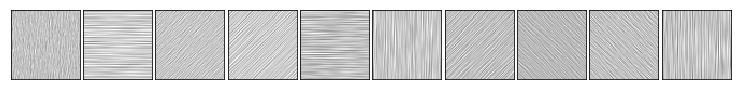

In [6]:
%matplotlib inline
import CHAMP.MC as MotionClouds
from CHAMP.DataLoader import LoadData, LoadCloudsDB
from CHAMP.DataTools import LocalContrastNormalization, FilterInputData
from CHAMP.Monitor import DisplayDico
import os

path = './clouds_easy'

TrSet, TeSet = LoadData(name = 'Clouds', data_path =path, decorrelate=False, resize=None, download = False,
                       clouds_diff = 'easy')
to_display = TrSet[0][0, 0:10, :, :, :] #displays 10 clouds

print('Size=', TrSet[0].shape)
DisplayDico(to_display)

Avec les normalisations et les gaussiens :

Local normalization
Gaussian filtered


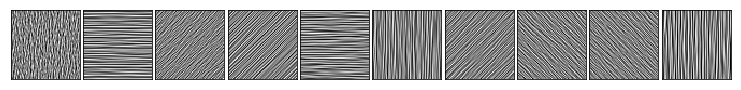

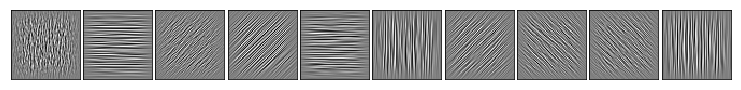

In [8]:
Normalized_TrSet, _, _, _ = LocalContrastNormalization(TrSet)
to_display = Normalized_TrSet[0][0, 0:10, :, :, :]
print("Local normalization")
DisplayDico(to_display)

Filtered_L_TrSet = FilterInputData(
    Normalized_TrSet, sigma=0.25, style='Custom', start_R=15)
to_display = Filtered_L_TrSet[0][0, 0:10, :, :, :]
print("Gaussian filtered")
DisplayDico(to_display)

Premier layer convo : On entraine le réseau (4 mn/200 epochs sur une 1080) :

In [22]:
from CHAMP.CHAMP_Layer import CHAMP_Layer
from CHAMP.DataLoader import LoadData
from CHAMP.DataTools import LocalContrastNormalization, FilterInputData, GenerateMask
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP, DisplayWhere

# MP Parameters
nb_dico = 12
width = 10
dico_size = (width, width)
l0 = 20
seed = 30
# Learning Parameters
eta = .05
nb_epoch = 200

#expect approx 10mn of training for 500 epochs
L1 = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                 dico_size=dico_size, verbose=2)
dico = L1.TrainLayer(Filtered_L_TrSet, eta=eta, nb_epoch=nb_epoch, seed=seed)

import pickle 
pickle.dump(L1, open('L1.p', 'wb'))

epoch 1 - 100 done in 1m19s
epoch 100 - 200 done in 1m18s


In [11]:
import pickle
L1 = pickle.load( open('L1.p', 'rb'))

On display :

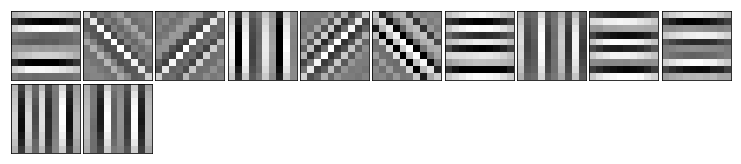

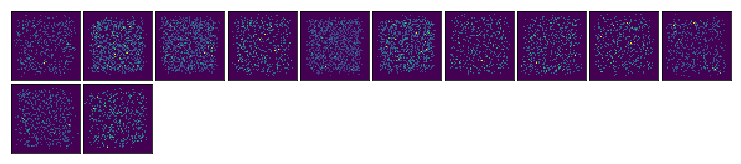

In [23]:
DisplayDico(L1.dictionary)

DisplayWhere(L1.where)

Et maintenant pour le second layer, en reg logistique :

In [36]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

L1dico = L1.dictionary
print(L1dico.size())

class LogReg(nn.Module) :
    def __init__(self):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(10,4)
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = LogReg()
print(model)

#CEL en SGD
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  

torch.Size([12, 1, 10, 10])
LogReg(
  (linear): Linear(in_features=10, out_features=4, bias=True)
)


On fit :

In [62]:
import torch
import torchvision
from torchvision import transforms, datasets

data_transform = transforms.Compose(
    [transforms.Grayscale(),
     transforms.Resize((32,32)),
    transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5,0.5), (0.5,0.5,0.5))])

train_set = datasets.ImageFolder(root='clouds_easy',
                                transform=data_transform)
train_loader = torch.utils.data.DataLoader(train_set,
                                             batch_size=12, shuffle=True,
                                             num_workers=1, drop_last = True)

for epoch in range(500):
    for i, data in enumerate(train_loader):
        images, labels = data
        images, labels = Variable(images), Variable(labels)
        
        images = images.view(-1,32*32)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(L1dico)
        outputs = outputs.view(-1,40)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 10 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, 2, i+1, len(train_set)//12, loss.data[0]))

/home/hugo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: [1/2], Step: [10/166], Loss: 3.7372
Epoch: [1/2], Step: [20/166], Loss: 3.6959
Epoch: [1/2], Step: [30/166], Loss: 3.6906
Epoch: [1/2], Step: [40/166], Loss: 3.6913
Epoch: [1/2], Step: [50/166], Loss: 3.6788
Epoch: [1/2], Step: [60/166], Loss: 3.7017
Epoch: [1/2], Step: [70/166], Loss: 3.6862
Epoch: [1/2], Step: [80/166], Loss: 3.6934
Epoch: [1/2], Step: [90/166], Loss: 3.7328
Epoch: [1/2], Step: [100/166], Loss: 3.7003
Epoch: [1/2], Step: [110/166], Loss: 3.7227
Epoch: [1/2], Step: [120/166], Loss: 3.7186
Epoch: [1/2], Step: [130/166], Loss: 3.6952
Epoch: [1/2], Step: [140/166], Loss: 3.6887
Epoch: [1/2], Step: [150/166], Loss: 3.6998
Epoch: [1/2], Step: [160/166], Loss: 3.6439
Epoch: [2/2], Step: [10/166], Loss: 3.6610
Epoch: [2/2], Step: [20/166], Loss: 3.7347
Epoch: [2/2], Step: [30/166], Loss: 3.6753
Epoch: [2/2], Step: [40/166], Loss: 3.7120
Epoch: [2/2], Step: [50/166], Loss: 3.6593
Epoch: [2/2], Step: [60/166], Loss: 3.7222
Epoch: [2/2], Step: [70/166], Loss: 3.7196
Epoc

Epoch: [12/2], Step: [130/166], Loss: 3.7012
Epoch: [12/2], Step: [140/166], Loss: 3.7441
Epoch: [12/2], Step: [150/166], Loss: 3.6906
Epoch: [12/2], Step: [160/166], Loss: 3.6702
Epoch: [13/2], Step: [10/166], Loss: 3.6626
Epoch: [13/2], Step: [20/166], Loss: 3.6550
Epoch: [13/2], Step: [30/166], Loss: 3.6781
Epoch: [13/2], Step: [40/166], Loss: 3.6923
Epoch: [13/2], Step: [50/166], Loss: 3.6609
Epoch: [13/2], Step: [60/166], Loss: 3.7094
Epoch: [13/2], Step: [70/166], Loss: 3.6825
Epoch: [13/2], Step: [80/166], Loss: 3.7066
Epoch: [13/2], Step: [90/166], Loss: 3.6846
Epoch: [13/2], Step: [100/166], Loss: 3.6936
Epoch: [13/2], Step: [110/166], Loss: 3.6683
Epoch: [13/2], Step: [120/166], Loss: 3.7212
Epoch: [13/2], Step: [130/166], Loss: 3.7060
Epoch: [13/2], Step: [140/166], Loss: 3.7242
Epoch: [13/2], Step: [150/166], Loss: 3.6825
Epoch: [13/2], Step: [160/166], Loss: 3.6886
Epoch: [14/2], Step: [10/166], Loss: 3.6707
Epoch: [14/2], Step: [20/166], Loss: 3.7047
Epoch: [14/2], Step: 

Epoch: [24/2], Step: [70/166], Loss: 3.7026
Epoch: [24/2], Step: [80/166], Loss: 3.6692
Epoch: [24/2], Step: [90/166], Loss: 3.6850
Epoch: [24/2], Step: [100/166], Loss: 3.6889
Epoch: [24/2], Step: [110/166], Loss: 3.6901
Epoch: [24/2], Step: [120/166], Loss: 3.7101
Epoch: [24/2], Step: [130/166], Loss: 3.6875
Epoch: [24/2], Step: [140/166], Loss: 3.6665
Epoch: [24/2], Step: [150/166], Loss: 3.7211
Epoch: [24/2], Step: [160/166], Loss: 3.6789
Epoch: [25/2], Step: [10/166], Loss: 3.6881
Epoch: [25/2], Step: [20/166], Loss: 3.6994
Epoch: [25/2], Step: [30/166], Loss: 3.6825
Epoch: [25/2], Step: [40/166], Loss: 3.6764
Epoch: [25/2], Step: [50/166], Loss: 3.6809
Epoch: [25/2], Step: [60/166], Loss: 3.7006
Epoch: [25/2], Step: [70/166], Loss: 3.7010
Epoch: [25/2], Step: [80/166], Loss: 3.6814
Epoch: [25/2], Step: [90/166], Loss: 3.7289
Epoch: [25/2], Step: [100/166], Loss: 3.6694
Epoch: [25/2], Step: [110/166], Loss: 3.6802
Epoch: [25/2], Step: [120/166], Loss: 3.6941
Epoch: [25/2], Step: [

Epoch: [36/2], Step: [10/166], Loss: 3.6961
Epoch: [36/2], Step: [20/166], Loss: 3.6827
Epoch: [36/2], Step: [30/166], Loss: 3.6967
Epoch: [36/2], Step: [40/166], Loss: 3.6936
Epoch: [36/2], Step: [50/166], Loss: 3.6881
Epoch: [36/2], Step: [60/166], Loss: 3.6936
Epoch: [36/2], Step: [70/166], Loss: 3.6814
Epoch: [36/2], Step: [80/166], Loss: 3.7177
Epoch: [36/2], Step: [90/166], Loss: 3.6914
Epoch: [36/2], Step: [100/166], Loss: 3.6768
Epoch: [36/2], Step: [110/166], Loss: 3.6825
Epoch: [36/2], Step: [120/166], Loss: 3.6732
Epoch: [36/2], Step: [130/166], Loss: 3.6877
Epoch: [36/2], Step: [140/166], Loss: 3.6992
Epoch: [36/2], Step: [150/166], Loss: 3.7044
Epoch: [36/2], Step: [160/166], Loss: 3.6835
Epoch: [37/2], Step: [10/166], Loss: 3.6932
Epoch: [37/2], Step: [20/166], Loss: 3.6791
Epoch: [37/2], Step: [30/166], Loss: 3.6806
Epoch: [37/2], Step: [40/166], Loss: 3.6784
Epoch: [37/2], Step: [50/166], Loss: 3.7209
Epoch: [37/2], Step: [60/166], Loss: 3.6942
Epoch: [37/2], Step: [70/

Epoch: [47/2], Step: [110/166], Loss: 3.6573
Epoch: [47/2], Step: [120/166], Loss: 3.6903
Epoch: [47/2], Step: [130/166], Loss: 3.6748
Epoch: [47/2], Step: [140/166], Loss: 3.6741
Epoch: [47/2], Step: [150/166], Loss: 3.6947
Epoch: [47/2], Step: [160/166], Loss: 3.6957
Epoch: [48/2], Step: [10/166], Loss: 3.6846
Epoch: [48/2], Step: [20/166], Loss: 3.6779
Epoch: [48/2], Step: [30/166], Loss: 3.6827
Epoch: [48/2], Step: [40/166], Loss: 3.6962
Epoch: [48/2], Step: [50/166], Loss: 3.6954
Epoch: [48/2], Step: [60/166], Loss: 3.7023
Epoch: [48/2], Step: [70/166], Loss: 3.6973
Epoch: [48/2], Step: [80/166], Loss: 3.6991
Epoch: [48/2], Step: [90/166], Loss: 3.6930
Epoch: [48/2], Step: [100/166], Loss: 3.7029
Epoch: [48/2], Step: [110/166], Loss: 3.6920
Epoch: [48/2], Step: [120/166], Loss: 3.6841
Epoch: [48/2], Step: [130/166], Loss: 3.6836
Epoch: [48/2], Step: [140/166], Loss: 3.6863
Epoch: [48/2], Step: [150/166], Loss: 3.6658
Epoch: [48/2], Step: [160/166], Loss: 3.6707
Epoch: [49/2], Step

Epoch: [59/2], Step: [50/166], Loss: 3.6930
Epoch: [59/2], Step: [60/166], Loss: 3.6778
Epoch: [59/2], Step: [70/166], Loss: 3.6959
Epoch: [59/2], Step: [80/166], Loss: 3.6782
Epoch: [59/2], Step: [90/166], Loss: 3.6865
Epoch: [59/2], Step: [100/166], Loss: 3.6859
Epoch: [59/2], Step: [110/166], Loss: 3.6963
Epoch: [59/2], Step: [120/166], Loss: 3.7062
Epoch: [59/2], Step: [130/166], Loss: 3.6932
Epoch: [59/2], Step: [140/166], Loss: 3.6741
Epoch: [59/2], Step: [150/166], Loss: 3.6817
Epoch: [59/2], Step: [160/166], Loss: 3.6884
Epoch: [60/2], Step: [10/166], Loss: 3.6994
Epoch: [60/2], Step: [20/166], Loss: 3.6739
Epoch: [60/2], Step: [30/166], Loss: 3.6787
Epoch: [60/2], Step: [40/166], Loss: 3.6783
Epoch: [60/2], Step: [50/166], Loss: 3.7008
Epoch: [60/2], Step: [60/166], Loss: 3.6775
Epoch: [60/2], Step: [70/166], Loss: 3.7050
Epoch: [60/2], Step: [80/166], Loss: 3.6862
Epoch: [60/2], Step: [90/166], Loss: 3.6917
Epoch: [60/2], Step: [100/166], Loss: 3.6765
Epoch: [60/2], Step: [11

Epoch: [70/2], Step: [150/166], Loss: 3.6947
Epoch: [70/2], Step: [160/166], Loss: 3.6935
Epoch: [71/2], Step: [10/166], Loss: 3.6777
Epoch: [71/2], Step: [20/166], Loss: 3.6973
Epoch: [71/2], Step: [30/166], Loss: 3.6983
Epoch: [71/2], Step: [40/166], Loss: 3.7045
Epoch: [71/2], Step: [50/166], Loss: 3.6904
Epoch: [71/2], Step: [60/166], Loss: 3.7055
Epoch: [71/2], Step: [70/166], Loss: 3.6835
Epoch: [71/2], Step: [80/166], Loss: 3.6739
Epoch: [71/2], Step: [90/166], Loss: 3.7107
Epoch: [71/2], Step: [100/166], Loss: 3.6868
Epoch: [71/2], Step: [110/166], Loss: 3.6858
Epoch: [71/2], Step: [120/166], Loss: 3.6754
Epoch: [71/2], Step: [130/166], Loss: 3.6822
Epoch: [71/2], Step: [140/166], Loss: 3.6724
Epoch: [71/2], Step: [150/166], Loss: 3.6924
Epoch: [71/2], Step: [160/166], Loss: 3.6829
Epoch: [72/2], Step: [10/166], Loss: 3.6781
Epoch: [72/2], Step: [20/166], Loss: 3.6883
Epoch: [72/2], Step: [30/166], Loss: 3.6828
Epoch: [72/2], Step: [40/166], Loss: 3.6826
Epoch: [72/2], Step: [5

Epoch: [82/2], Step: [90/166], Loss: 3.6928
Epoch: [82/2], Step: [100/166], Loss: 3.7112
Epoch: [82/2], Step: [110/166], Loss: 3.6766
Epoch: [82/2], Step: [120/166], Loss: 3.6707
Epoch: [82/2], Step: [130/166], Loss: 3.6991
Epoch: [82/2], Step: [140/166], Loss: 3.6706
Epoch: [82/2], Step: [150/166], Loss: 3.6774
Epoch: [82/2], Step: [160/166], Loss: 3.6898
Epoch: [83/2], Step: [10/166], Loss: 3.6950
Epoch: [83/2], Step: [20/166], Loss: 3.6792
Epoch: [83/2], Step: [30/166], Loss: 3.6999
Epoch: [83/2], Step: [40/166], Loss: 3.6849
Epoch: [83/2], Step: [50/166], Loss: 3.6749
Epoch: [83/2], Step: [60/166], Loss: 3.6737
Epoch: [83/2], Step: [70/166], Loss: 3.6844
Epoch: [83/2], Step: [80/166], Loss: 3.6865
Epoch: [83/2], Step: [90/166], Loss: 3.6786
Epoch: [83/2], Step: [100/166], Loss: 3.6852
Epoch: [83/2], Step: [110/166], Loss: 3.6992
Epoch: [83/2], Step: [120/166], Loss: 3.7013
Epoch: [83/2], Step: [130/166], Loss: 3.6851
Epoch: [83/2], Step: [140/166], Loss: 3.7052
Epoch: [83/2], Step:

Epoch: [94/2], Step: [30/166], Loss: 3.6811
Epoch: [94/2], Step: [40/166], Loss: 3.7088
Epoch: [94/2], Step: [50/166], Loss: 3.6734
Epoch: [94/2], Step: [60/166], Loss: 3.6864
Epoch: [94/2], Step: [70/166], Loss: 3.6754
Epoch: [94/2], Step: [80/166], Loss: 3.6909
Epoch: [94/2], Step: [90/166], Loss: 3.6844
Epoch: [94/2], Step: [100/166], Loss: 3.6981
Epoch: [94/2], Step: [110/166], Loss: 3.6761
Epoch: [94/2], Step: [120/166], Loss: 3.6756
Epoch: [94/2], Step: [130/166], Loss: 3.6788
Epoch: [94/2], Step: [140/166], Loss: 3.6701
Epoch: [94/2], Step: [150/166], Loss: 3.6891
Epoch: [94/2], Step: [160/166], Loss: 3.6952
Epoch: [95/2], Step: [10/166], Loss: 3.6963
Epoch: [95/2], Step: [20/166], Loss: 3.6731
Epoch: [95/2], Step: [30/166], Loss: 3.6865
Epoch: [95/2], Step: [40/166], Loss: 3.6635
Epoch: [95/2], Step: [50/166], Loss: 3.6970
Epoch: [95/2], Step: [60/166], Loss: 3.6871
Epoch: [95/2], Step: [70/166], Loss: 3.6936
Epoch: [95/2], Step: [80/166], Loss: 3.6924
Epoch: [95/2], Step: [90/

Epoch: [105/2], Step: [110/166], Loss: 3.6773
Epoch: [105/2], Step: [120/166], Loss: 3.6629
Epoch: [105/2], Step: [130/166], Loss: 3.6839
Epoch: [105/2], Step: [140/166], Loss: 3.6835
Epoch: [105/2], Step: [150/166], Loss: 3.6616
Epoch: [105/2], Step: [160/166], Loss: 3.6927
Epoch: [106/2], Step: [10/166], Loss: 3.6600
Epoch: [106/2], Step: [20/166], Loss: 3.6829
Epoch: [106/2], Step: [30/166], Loss: 3.6747
Epoch: [106/2], Step: [40/166], Loss: 3.6814
Epoch: [106/2], Step: [50/166], Loss: 3.6742
Epoch: [106/2], Step: [60/166], Loss: 3.6820
Epoch: [106/2], Step: [70/166], Loss: 3.6809
Epoch: [106/2], Step: [80/166], Loss: 3.6733
Epoch: [106/2], Step: [90/166], Loss: 3.6931
Epoch: [106/2], Step: [100/166], Loss: 3.6902
Epoch: [106/2], Step: [110/166], Loss: 3.6778
Epoch: [106/2], Step: [120/166], Loss: 3.6678
Epoch: [106/2], Step: [130/166], Loss: 3.6692
Epoch: [106/2], Step: [140/166], Loss: 3.6685
Epoch: [106/2], Step: [150/166], Loss: 3.6889
Epoch: [106/2], Step: [160/166], Loss: 3.69

Epoch: [117/2], Step: [10/166], Loss: 3.6816
Epoch: [117/2], Step: [20/166], Loss: 3.6847
Epoch: [117/2], Step: [30/166], Loss: 3.6911
Epoch: [117/2], Step: [40/166], Loss: 3.6711
Epoch: [117/2], Step: [50/166], Loss: 3.6876
Epoch: [117/2], Step: [60/166], Loss: 3.6686
Epoch: [117/2], Step: [70/166], Loss: 3.6761
Epoch: [117/2], Step: [80/166], Loss: 3.6781
Epoch: [117/2], Step: [90/166], Loss: 3.6923
Epoch: [117/2], Step: [100/166], Loss: 3.6889
Epoch: [117/2], Step: [110/166], Loss: 3.6765
Epoch: [117/2], Step: [120/166], Loss: 3.6832
Epoch: [117/2], Step: [130/166], Loss: 3.6933
Epoch: [117/2], Step: [140/166], Loss: 3.6731
Epoch: [117/2], Step: [150/166], Loss: 3.6827
Epoch: [117/2], Step: [160/166], Loss: 3.6729
Epoch: [118/2], Step: [10/166], Loss: 3.6698
Epoch: [118/2], Step: [20/166], Loss: 3.6781
Epoch: [118/2], Step: [30/166], Loss: 3.6734
Epoch: [118/2], Step: [40/166], Loss: 3.6724
Epoch: [118/2], Step: [50/166], Loss: 3.6739
Epoch: [118/2], Step: [60/166], Loss: 3.6890
Epo

Epoch: [128/2], Step: [70/166], Loss: 3.6518
Epoch: [128/2], Step: [80/166], Loss: 3.6766
Epoch: [128/2], Step: [90/166], Loss: 3.6676
Epoch: [128/2], Step: [100/166], Loss: 3.6887
Epoch: [128/2], Step: [110/166], Loss: 3.6929
Epoch: [128/2], Step: [120/166], Loss: 3.6893
Epoch: [128/2], Step: [130/166], Loss: 3.6924
Epoch: [128/2], Step: [140/166], Loss: 3.6848
Epoch: [128/2], Step: [150/166], Loss: 3.6876
Epoch: [128/2], Step: [160/166], Loss: 3.6617
Epoch: [129/2], Step: [10/166], Loss: 3.6868
Epoch: [129/2], Step: [20/166], Loss: 3.6973
Epoch: [129/2], Step: [30/166], Loss: 3.6812
Epoch: [129/2], Step: [40/166], Loss: 3.6785
Epoch: [129/2], Step: [50/166], Loss: 3.6875
Epoch: [129/2], Step: [60/166], Loss: 3.6953
Epoch: [129/2], Step: [70/166], Loss: 3.6699
Epoch: [129/2], Step: [80/166], Loss: 3.6947
Epoch: [129/2], Step: [90/166], Loss: 3.6860
Epoch: [129/2], Step: [100/166], Loss: 3.6938
Epoch: [129/2], Step: [110/166], Loss: 3.6800
Epoch: [129/2], Step: [120/166], Loss: 3.6956


Epoch: [139/2], Step: [130/166], Loss: 3.6795
Epoch: [139/2], Step: [140/166], Loss: 3.6879
Epoch: [139/2], Step: [150/166], Loss: 3.6630
Epoch: [139/2], Step: [160/166], Loss: 3.6721
Epoch: [140/2], Step: [10/166], Loss: 3.6785
Epoch: [140/2], Step: [20/166], Loss: 3.6745
Epoch: [140/2], Step: [30/166], Loss: 3.6954
Epoch: [140/2], Step: [40/166], Loss: 3.6701
Epoch: [140/2], Step: [50/166], Loss: 3.6754
Epoch: [140/2], Step: [60/166], Loss: 3.6838
Epoch: [140/2], Step: [70/166], Loss: 3.6739
Epoch: [140/2], Step: [80/166], Loss: 3.6738
Epoch: [140/2], Step: [90/166], Loss: 3.6826
Epoch: [140/2], Step: [100/166], Loss: 3.6815
Epoch: [140/2], Step: [110/166], Loss: 3.6739
Epoch: [140/2], Step: [120/166], Loss: 3.6618
Epoch: [140/2], Step: [130/166], Loss: 3.6767
Epoch: [140/2], Step: [140/166], Loss: 3.6600
Epoch: [140/2], Step: [150/166], Loss: 3.6809
Epoch: [140/2], Step: [160/166], Loss: 3.6919
Epoch: [141/2], Step: [10/166], Loss: 3.6924
Epoch: [141/2], Step: [20/166], Loss: 3.6723

Epoch: [151/2], Step: [30/166], Loss: 3.6755
Epoch: [151/2], Step: [40/166], Loss: 3.6953
Epoch: [151/2], Step: [50/166], Loss: 3.6749
Epoch: [151/2], Step: [60/166], Loss: 3.6892
Epoch: [151/2], Step: [70/166], Loss: 3.6855
Epoch: [151/2], Step: [80/166], Loss: 3.6880
Epoch: [151/2], Step: [90/166], Loss: 3.6694
Epoch: [151/2], Step: [100/166], Loss: 3.6665
Epoch: [151/2], Step: [110/166], Loss: 3.6832
Epoch: [151/2], Step: [120/166], Loss: 3.6653
Epoch: [151/2], Step: [130/166], Loss: 3.6779
Epoch: [151/2], Step: [140/166], Loss: 3.6776
Epoch: [151/2], Step: [150/166], Loss: 3.6825
Epoch: [151/2], Step: [160/166], Loss: 3.6728
Epoch: [152/2], Step: [10/166], Loss: 3.6683
Epoch: [152/2], Step: [20/166], Loss: 3.6755
Epoch: [152/2], Step: [30/166], Loss: 3.6856
Epoch: [152/2], Step: [40/166], Loss: 3.6566
Epoch: [152/2], Step: [50/166], Loss: 3.6686
Epoch: [152/2], Step: [60/166], Loss: 3.6819
Epoch: [152/2], Step: [70/166], Loss: 3.6848
Epoch: [152/2], Step: [80/166], Loss: 3.6945
Epo

Epoch: [162/2], Step: [90/166], Loss: 3.6673
Epoch: [162/2], Step: [100/166], Loss: 3.6561
Epoch: [162/2], Step: [110/166], Loss: 3.6689
Epoch: [162/2], Step: [120/166], Loss: 3.6839
Epoch: [162/2], Step: [130/166], Loss: 3.6874
Epoch: [162/2], Step: [140/166], Loss: 3.6701
Epoch: [162/2], Step: [150/166], Loss: 3.6753
Epoch: [162/2], Step: [160/166], Loss: 3.6918
Epoch: [163/2], Step: [10/166], Loss: 3.6813
Epoch: [163/2], Step: [20/166], Loss: 3.6681
Epoch: [163/2], Step: [30/166], Loss: 3.6701
Epoch: [163/2], Step: [40/166], Loss: 3.6754
Epoch: [163/2], Step: [50/166], Loss: 3.6807
Epoch: [163/2], Step: [60/166], Loss: 3.6865
Epoch: [163/2], Step: [70/166], Loss: 3.6873
Epoch: [163/2], Step: [80/166], Loss: 3.6591
Epoch: [163/2], Step: [90/166], Loss: 3.6740
Epoch: [163/2], Step: [100/166], Loss: 3.6766
Epoch: [163/2], Step: [110/166], Loss: 3.6800
Epoch: [163/2], Step: [120/166], Loss: 3.6821
Epoch: [163/2], Step: [130/166], Loss: 3.6575
Epoch: [163/2], Step: [140/166], Loss: 3.679

Epoch: [173/2], Step: [140/166], Loss: 3.6879
Epoch: [173/2], Step: [150/166], Loss: 3.6704
Epoch: [173/2], Step: [160/166], Loss: 3.6666
Epoch: [174/2], Step: [10/166], Loss: 3.6805
Epoch: [174/2], Step: [20/166], Loss: 3.6952
Epoch: [174/2], Step: [30/166], Loss: 3.6661
Epoch: [174/2], Step: [40/166], Loss: 3.6772
Epoch: [174/2], Step: [50/166], Loss: 3.6705
Epoch: [174/2], Step: [60/166], Loss: 3.6872
Epoch: [174/2], Step: [70/166], Loss: 3.6590
Epoch: [174/2], Step: [80/166], Loss: 3.6852
Epoch: [174/2], Step: [90/166], Loss: 3.6768
Epoch: [174/2], Step: [100/166], Loss: 3.6700
Epoch: [174/2], Step: [110/166], Loss: 3.6762
Epoch: [174/2], Step: [120/166], Loss: 3.6725
Epoch: [174/2], Step: [130/166], Loss: 3.6804
Epoch: [174/2], Step: [140/166], Loss: 3.6782
Epoch: [174/2], Step: [150/166], Loss: 3.6745
Epoch: [174/2], Step: [160/166], Loss: 3.6940
Epoch: [175/2], Step: [10/166], Loss: 3.6620
Epoch: [175/2], Step: [20/166], Loss: 3.6779
Epoch: [175/2], Step: [30/166], Loss: 3.6803


Epoch: [185/2], Step: [30/166], Loss: 3.6783
Epoch: [185/2], Step: [40/166], Loss: 3.6753
Epoch: [185/2], Step: [50/166], Loss: 3.6571
Epoch: [185/2], Step: [60/166], Loss: 3.6695
Epoch: [185/2], Step: [70/166], Loss: 3.6725
Epoch: [185/2], Step: [80/166], Loss: 3.6794
Epoch: [185/2], Step: [90/166], Loss: 3.6559
Epoch: [185/2], Step: [100/166], Loss: 3.6743
Epoch: [185/2], Step: [110/166], Loss: 3.6769
Epoch: [185/2], Step: [120/166], Loss: 3.6824
Epoch: [185/2], Step: [130/166], Loss: 3.6737
Epoch: [185/2], Step: [140/166], Loss: 3.6664
Epoch: [185/2], Step: [150/166], Loss: 3.6903
Epoch: [185/2], Step: [160/166], Loss: 3.6662
Epoch: [186/2], Step: [10/166], Loss: 3.6799
Epoch: [186/2], Step: [20/166], Loss: 3.6818
Epoch: [186/2], Step: [30/166], Loss: 3.6807
Epoch: [186/2], Step: [40/166], Loss: 3.6500
Epoch: [186/2], Step: [50/166], Loss: 3.6570
Epoch: [186/2], Step: [60/166], Loss: 3.6567
Epoch: [186/2], Step: [70/166], Loss: 3.6698
Epoch: [186/2], Step: [80/166], Loss: 3.6664
Epo

Epoch: [196/2], Step: [90/166], Loss: 3.6712
Epoch: [196/2], Step: [100/166], Loss: 3.6860
Epoch: [196/2], Step: [110/166], Loss: 3.6780
Epoch: [196/2], Step: [120/166], Loss: 3.6811
Epoch: [196/2], Step: [130/166], Loss: 3.6647
Epoch: [196/2], Step: [140/166], Loss: 3.6634
Epoch: [196/2], Step: [150/166], Loss: 3.6638
Epoch: [196/2], Step: [160/166], Loss: 3.6811
Epoch: [197/2], Step: [10/166], Loss: 3.6506
Epoch: [197/2], Step: [20/166], Loss: 3.6810
Epoch: [197/2], Step: [30/166], Loss: 3.6677
Epoch: [197/2], Step: [40/166], Loss: 3.6821
Epoch: [197/2], Step: [50/166], Loss: 3.6661
Epoch: [197/2], Step: [60/166], Loss: 3.6616
Epoch: [197/2], Step: [70/166], Loss: 3.6630
Epoch: [197/2], Step: [80/166], Loss: 3.6655
Epoch: [197/2], Step: [90/166], Loss: 3.6645
Epoch: [197/2], Step: [100/166], Loss: 3.6714
Epoch: [197/2], Step: [110/166], Loss: 3.6637
Epoch: [197/2], Step: [120/166], Loss: 3.6747
Epoch: [197/2], Step: [130/166], Loss: 3.6659
Epoch: [197/2], Step: [140/166], Loss: 3.662

Epoch: [207/2], Step: [150/166], Loss: 3.6590
Epoch: [207/2], Step: [160/166], Loss: 3.6796
Epoch: [208/2], Step: [10/166], Loss: 3.6570
Epoch: [208/2], Step: [20/166], Loss: 3.6725
Epoch: [208/2], Step: [30/166], Loss: 3.6633
Epoch: [208/2], Step: [40/166], Loss: 3.6601
Epoch: [208/2], Step: [50/166], Loss: 3.6603
Epoch: [208/2], Step: [60/166], Loss: 3.6583
Epoch: [208/2], Step: [70/166], Loss: 3.6635
Epoch: [208/2], Step: [80/166], Loss: 3.6626
Epoch: [208/2], Step: [90/166], Loss: 3.6646
Epoch: [208/2], Step: [100/166], Loss: 3.6607
Epoch: [208/2], Step: [110/166], Loss: 3.6754
Epoch: [208/2], Step: [120/166], Loss: 3.6802
Epoch: [208/2], Step: [130/166], Loss: 3.6719
Epoch: [208/2], Step: [140/166], Loss: 3.6670
Epoch: [208/2], Step: [150/166], Loss: 3.6771
Epoch: [208/2], Step: [160/166], Loss: 3.6710
Epoch: [209/2], Step: [10/166], Loss: 3.6562
Epoch: [209/2], Step: [20/166], Loss: 3.6547
Epoch: [209/2], Step: [30/166], Loss: 3.6703
Epoch: [209/2], Step: [40/166], Loss: 3.6694
E

Epoch: [219/2], Step: [50/166], Loss: 3.6503
Epoch: [219/2], Step: [60/166], Loss: 3.6694
Epoch: [219/2], Step: [70/166], Loss: 3.6690
Epoch: [219/2], Step: [80/166], Loss: 3.6827
Epoch: [219/2], Step: [90/166], Loss: 3.6749
Epoch: [219/2], Step: [100/166], Loss: 3.6787
Epoch: [219/2], Step: [110/166], Loss: 3.6649
Epoch: [219/2], Step: [120/166], Loss: 3.6808
Epoch: [219/2], Step: [130/166], Loss: 3.6805
Epoch: [219/2], Step: [140/166], Loss: 3.6759
Epoch: [219/2], Step: [150/166], Loss: 3.6816
Epoch: [219/2], Step: [160/166], Loss: 3.6662
Epoch: [220/2], Step: [10/166], Loss: 3.6590
Epoch: [220/2], Step: [20/166], Loss: 3.6616
Epoch: [220/2], Step: [30/166], Loss: 3.6806
Epoch: [220/2], Step: [40/166], Loss: 3.6635
Epoch: [220/2], Step: [50/166], Loss: 3.6502
Epoch: [220/2], Step: [60/166], Loss: 3.6540
Epoch: [220/2], Step: [70/166], Loss: 3.6676
Epoch: [220/2], Step: [80/166], Loss: 3.6753
Epoch: [220/2], Step: [90/166], Loss: 3.6531
Epoch: [220/2], Step: [100/166], Loss: 3.6744
Ep

Epoch: [230/2], Step: [110/166], Loss: 3.6688
Epoch: [230/2], Step: [120/166], Loss: 3.6537
Epoch: [230/2], Step: [130/166], Loss: 3.6600
Epoch: [230/2], Step: [140/166], Loss: 3.6719
Epoch: [230/2], Step: [150/166], Loss: 3.6616
Epoch: [230/2], Step: [160/166], Loss: 3.6722
Epoch: [231/2], Step: [10/166], Loss: 3.6564
Epoch: [231/2], Step: [20/166], Loss: 3.6686
Epoch: [231/2], Step: [30/166], Loss: 3.6679
Epoch: [231/2], Step: [40/166], Loss: 3.6648
Epoch: [231/2], Step: [50/166], Loss: 3.6597
Epoch: [231/2], Step: [60/166], Loss: 3.6833
Epoch: [231/2], Step: [70/166], Loss: 3.6606
Epoch: [231/2], Step: [80/166], Loss: 3.6805
Epoch: [231/2], Step: [90/166], Loss: 3.6799
Epoch: [231/2], Step: [100/166], Loss: 3.6733
Epoch: [231/2], Step: [110/166], Loss: 3.6722
Epoch: [231/2], Step: [120/166], Loss: 3.6793
Epoch: [231/2], Step: [130/166], Loss: 3.6661
Epoch: [231/2], Step: [140/166], Loss: 3.6590
Epoch: [231/2], Step: [150/166], Loss: 3.6748
Epoch: [231/2], Step: [160/166], Loss: 3.67

Epoch: [242/2], Step: [10/166], Loss: 3.6684
Epoch: [242/2], Step: [20/166], Loss: 3.6650
Epoch: [242/2], Step: [30/166], Loss: 3.6790
Epoch: [242/2], Step: [40/166], Loss: 3.6588
Epoch: [242/2], Step: [50/166], Loss: 3.6614
Epoch: [242/2], Step: [60/166], Loss: 3.6703
Epoch: [242/2], Step: [70/166], Loss: 3.6800
Epoch: [242/2], Step: [80/166], Loss: 3.6662
Epoch: [242/2], Step: [90/166], Loss: 3.6504
Epoch: [242/2], Step: [100/166], Loss: 3.6650
Epoch: [242/2], Step: [110/166], Loss: 3.6709
Epoch: [242/2], Step: [120/166], Loss: 3.6681
Epoch: [242/2], Step: [130/166], Loss: 3.6683
Epoch: [242/2], Step: [140/166], Loss: 3.6674
Epoch: [242/2], Step: [150/166], Loss: 3.6768
Epoch: [242/2], Step: [160/166], Loss: 3.6793
Epoch: [243/2], Step: [10/166], Loss: 3.6623
Epoch: [243/2], Step: [20/166], Loss: 3.6683
Epoch: [243/2], Step: [30/166], Loss: 3.6570
Epoch: [243/2], Step: [40/166], Loss: 3.6684
Epoch: [243/2], Step: [50/166], Loss: 3.6696
Epoch: [243/2], Step: [60/166], Loss: 3.6537
Epo

Epoch: [253/2], Step: [70/166], Loss: 3.6717
Epoch: [253/2], Step: [80/166], Loss: 3.6674
Epoch: [253/2], Step: [90/166], Loss: 3.6589
Epoch: [253/2], Step: [100/166], Loss: 3.6625
Epoch: [253/2], Step: [110/166], Loss: 3.6565
Epoch: [253/2], Step: [120/166], Loss: 3.6667
Epoch: [253/2], Step: [130/166], Loss: 3.6609
Epoch: [253/2], Step: [140/166], Loss: 3.6501
Epoch: [253/2], Step: [150/166], Loss: 3.6638
Epoch: [253/2], Step: [160/166], Loss: 3.6749
Epoch: [254/2], Step: [10/166], Loss: 3.6700
Epoch: [254/2], Step: [20/166], Loss: 3.6679
Epoch: [254/2], Step: [30/166], Loss: 3.6789
Epoch: [254/2], Step: [40/166], Loss: 3.6682
Epoch: [254/2], Step: [50/166], Loss: 3.6671
Epoch: [254/2], Step: [60/166], Loss: 3.6734
Epoch: [254/2], Step: [70/166], Loss: 3.6585
Epoch: [254/2], Step: [80/166], Loss: 3.6720
Epoch: [254/2], Step: [90/166], Loss: 3.6644
Epoch: [254/2], Step: [100/166], Loss: 3.6678
Epoch: [254/2], Step: [110/166], Loss: 3.6640
Epoch: [254/2], Step: [120/166], Loss: 3.6640


Epoch: [264/2], Step: [130/166], Loss: 3.6712
Epoch: [264/2], Step: [140/166], Loss: 3.6571
Epoch: [264/2], Step: [150/166], Loss: 3.6685
Epoch: [264/2], Step: [160/166], Loss: 3.6636
Epoch: [265/2], Step: [10/166], Loss: 3.6712
Epoch: [265/2], Step: [20/166], Loss: 3.6603
Epoch: [265/2], Step: [30/166], Loss: 3.6788
Epoch: [265/2], Step: [40/166], Loss: 3.6562
Epoch: [265/2], Step: [50/166], Loss: 3.6689
Epoch: [265/2], Step: [60/166], Loss: 3.6576
Epoch: [265/2], Step: [70/166], Loss: 3.6557
Epoch: [265/2], Step: [80/166], Loss: 3.6634
Epoch: [265/2], Step: [90/166], Loss: 3.6579
Epoch: [265/2], Step: [100/166], Loss: 3.6682
Epoch: [265/2], Step: [110/166], Loss: 3.6719
Epoch: [265/2], Step: [120/166], Loss: 3.6653
Epoch: [265/2], Step: [130/166], Loss: 3.6654
Epoch: [265/2], Step: [140/166], Loss: 3.6613
Epoch: [265/2], Step: [150/166], Loss: 3.6636
Epoch: [265/2], Step: [160/166], Loss: 3.6543
Epoch: [266/2], Step: [10/166], Loss: 3.6611
Epoch: [266/2], Step: [20/166], Loss: 3.6616

Epoch: [276/2], Step: [30/166], Loss: 3.6603
Epoch: [276/2], Step: [40/166], Loss: 3.6539
Epoch: [276/2], Step: [50/166], Loss: 3.6615
Epoch: [276/2], Step: [60/166], Loss: 3.6677
Epoch: [276/2], Step: [70/166], Loss: 3.6689
Epoch: [276/2], Step: [80/166], Loss: 3.6584
Epoch: [276/2], Step: [90/166], Loss: 3.6664
Epoch: [276/2], Step: [100/166], Loss: 3.6658
Epoch: [276/2], Step: [110/166], Loss: 3.6776
Epoch: [276/2], Step: [120/166], Loss: 3.6723
Epoch: [276/2], Step: [130/166], Loss: 3.6545
Epoch: [276/2], Step: [140/166], Loss: 3.6735
Epoch: [276/2], Step: [150/166], Loss: 3.6699
Epoch: [276/2], Step: [160/166], Loss: 3.6726
Epoch: [277/2], Step: [10/166], Loss: 3.6623
Epoch: [277/2], Step: [20/166], Loss: 3.6551
Epoch: [277/2], Step: [30/166], Loss: 3.6621
Epoch: [277/2], Step: [40/166], Loss: 3.6657
Epoch: [277/2], Step: [50/166], Loss: 3.6606
Epoch: [277/2], Step: [60/166], Loss: 3.6533
Epoch: [277/2], Step: [70/166], Loss: 3.6498
Epoch: [277/2], Step: [80/166], Loss: 3.6546
Epo

Epoch: [287/2], Step: [90/166], Loss: 3.6538
Epoch: [287/2], Step: [100/166], Loss: 3.6629
Epoch: [287/2], Step: [110/166], Loss: 3.6578
Epoch: [287/2], Step: [120/166], Loss: 3.6620
Epoch: [287/2], Step: [130/166], Loss: 3.6529
Epoch: [287/2], Step: [140/166], Loss: 3.6818
Epoch: [287/2], Step: [150/166], Loss: 3.6538
Epoch: [287/2], Step: [160/166], Loss: 3.6749
Epoch: [288/2], Step: [10/166], Loss: 3.6560
Epoch: [288/2], Step: [20/166], Loss: 3.6686
Epoch: [288/2], Step: [30/166], Loss: 3.6652
Epoch: [288/2], Step: [40/166], Loss: 3.6596
Epoch: [288/2], Step: [50/166], Loss: 3.6618
Epoch: [288/2], Step: [60/166], Loss: 3.6631
Epoch: [288/2], Step: [70/166], Loss: 3.6682
Epoch: [288/2], Step: [80/166], Loss: 3.6527
Epoch: [288/2], Step: [90/166], Loss: 3.6504
Epoch: [288/2], Step: [100/166], Loss: 3.6684
Epoch: [288/2], Step: [110/166], Loss: 3.6630
Epoch: [288/2], Step: [120/166], Loss: 3.6520
Epoch: [288/2], Step: [130/166], Loss: 3.6679
Epoch: [288/2], Step: [140/166], Loss: 3.657

Epoch: [298/2], Step: [150/166], Loss: 3.6532
Epoch: [298/2], Step: [160/166], Loss: 3.6650
Epoch: [299/2], Step: [10/166], Loss: 3.6710
Epoch: [299/2], Step: [20/166], Loss: 3.6685
Epoch: [299/2], Step: [30/166], Loss: 3.6610
Epoch: [299/2], Step: [40/166], Loss: 3.6739
Epoch: [299/2], Step: [50/166], Loss: 3.6570
Epoch: [299/2], Step: [60/166], Loss: 3.6378
Epoch: [299/2], Step: [70/166], Loss: 3.6589
Epoch: [299/2], Step: [80/166], Loss: 3.6645
Epoch: [299/2], Step: [90/166], Loss: 3.6656
Epoch: [299/2], Step: [100/166], Loss: 3.6607
Epoch: [299/2], Step: [110/166], Loss: 3.6606
Epoch: [299/2], Step: [120/166], Loss: 3.6635
Epoch: [299/2], Step: [130/166], Loss: 3.6506
Epoch: [299/2], Step: [140/166], Loss: 3.6667
Epoch: [299/2], Step: [150/166], Loss: 3.6659
Epoch: [299/2], Step: [160/166], Loss: 3.6627
Epoch: [300/2], Step: [10/166], Loss: 3.6570
Epoch: [300/2], Step: [20/166], Loss: 3.6657
Epoch: [300/2], Step: [30/166], Loss: 3.6531
Epoch: [300/2], Step: [40/166], Loss: 3.6550
E

Epoch: [310/2], Step: [50/166], Loss: 3.6520
Epoch: [310/2], Step: [60/166], Loss: 3.6648
Epoch: [310/2], Step: [70/166], Loss: 3.6456
Epoch: [310/2], Step: [80/166], Loss: 3.6620
Epoch: [310/2], Step: [90/166], Loss: 3.6585
Epoch: [310/2], Step: [100/166], Loss: 3.6574
Epoch: [310/2], Step: [110/166], Loss: 3.6585
Epoch: [310/2], Step: [120/166], Loss: 3.6550
Epoch: [310/2], Step: [130/166], Loss: 3.6606
Epoch: [310/2], Step: [140/166], Loss: 3.6680
Epoch: [310/2], Step: [150/166], Loss: 3.6650
Epoch: [310/2], Step: [160/166], Loss: 3.6532
Epoch: [311/2], Step: [10/166], Loss: 3.6556
Epoch: [311/2], Step: [20/166], Loss: 3.6552
Epoch: [311/2], Step: [30/166], Loss: 3.6544
Epoch: [311/2], Step: [40/166], Loss: 3.6747
Epoch: [311/2], Step: [50/166], Loss: 3.6563
Epoch: [311/2], Step: [60/166], Loss: 3.6535
Epoch: [311/2], Step: [70/166], Loss: 3.6580
Epoch: [311/2], Step: [80/166], Loss: 3.6738
Epoch: [311/2], Step: [90/166], Loss: 3.6667
Epoch: [311/2], Step: [100/166], Loss: 3.6702
Ep

Epoch: [321/2], Step: [110/166], Loss: 3.6618
Epoch: [321/2], Step: [120/166], Loss: 3.6543
Epoch: [321/2], Step: [130/166], Loss: 3.6611
Epoch: [321/2], Step: [140/166], Loss: 3.6562
Epoch: [321/2], Step: [150/166], Loss: 3.6671
Epoch: [321/2], Step: [160/166], Loss: 3.6644
Epoch: [322/2], Step: [10/166], Loss: 3.6658
Epoch: [322/2], Step: [20/166], Loss: 3.6609
Epoch: [322/2], Step: [30/166], Loss: 3.6647
Epoch: [322/2], Step: [40/166], Loss: 3.6625
Epoch: [322/2], Step: [50/166], Loss: 3.6595
Epoch: [322/2], Step: [60/166], Loss: 3.6641
Epoch: [322/2], Step: [70/166], Loss: 3.6498
Epoch: [322/2], Step: [80/166], Loss: 3.6618
Epoch: [322/2], Step: [90/166], Loss: 3.6629
Epoch: [322/2], Step: [100/166], Loss: 3.6602
Epoch: [322/2], Step: [110/166], Loss: 3.6638
Epoch: [322/2], Step: [120/166], Loss: 3.6712
Epoch: [322/2], Step: [130/166], Loss: 3.6663
Epoch: [322/2], Step: [140/166], Loss: 3.6524
Epoch: [322/2], Step: [150/166], Loss: 3.6570
Epoch: [322/2], Step: [160/166], Loss: 3.65

Epoch: [333/2], Step: [10/166], Loss: 3.6524
Epoch: [333/2], Step: [20/166], Loss: 3.6495
Epoch: [333/2], Step: [30/166], Loss: 3.6653
Epoch: [333/2], Step: [40/166], Loss: 3.6635
Epoch: [333/2], Step: [50/166], Loss: 3.6532
Epoch: [333/2], Step: [60/166], Loss: 3.6571
Epoch: [333/2], Step: [70/166], Loss: 3.6621
Epoch: [333/2], Step: [80/166], Loss: 3.6563
Epoch: [333/2], Step: [90/166], Loss: 3.6568
Epoch: [333/2], Step: [100/166], Loss: 3.6625
Epoch: [333/2], Step: [110/166], Loss: 3.6638
Epoch: [333/2], Step: [120/166], Loss: 3.6499
Epoch: [333/2], Step: [130/166], Loss: 3.6592
Epoch: [333/2], Step: [140/166], Loss: 3.6607
Epoch: [333/2], Step: [150/166], Loss: 3.6548
Epoch: [333/2], Step: [160/166], Loss: 3.6734
Epoch: [334/2], Step: [10/166], Loss: 3.6577
Epoch: [334/2], Step: [20/166], Loss: 3.6536
Epoch: [334/2], Step: [30/166], Loss: 3.6626
Epoch: [334/2], Step: [40/166], Loss: 3.6729
Epoch: [334/2], Step: [50/166], Loss: 3.6763
Epoch: [334/2], Step: [60/166], Loss: 3.6467
Epo

Epoch: [344/2], Step: [70/166], Loss: 3.6508
Epoch: [344/2], Step: [80/166], Loss: 3.6612
Epoch: [344/2], Step: [90/166], Loss: 3.6647
Epoch: [344/2], Step: [100/166], Loss: 3.6482
Epoch: [344/2], Step: [110/166], Loss: 3.6459
Epoch: [344/2], Step: [120/166], Loss: 3.6614
Epoch: [344/2], Step: [130/166], Loss: 3.6584
Epoch: [344/2], Step: [140/166], Loss: 3.6505
Epoch: [344/2], Step: [150/166], Loss: 3.6604
Epoch: [344/2], Step: [160/166], Loss: 3.6484
Epoch: [345/2], Step: [10/166], Loss: 3.6646
Epoch: [345/2], Step: [20/166], Loss: 3.6588
Epoch: [345/2], Step: [30/166], Loss: 3.6616
Epoch: [345/2], Step: [40/166], Loss: 3.6632
Epoch: [345/2], Step: [50/166], Loss: 3.6533
Epoch: [345/2], Step: [60/166], Loss: 3.6550
Epoch: [345/2], Step: [70/166], Loss: 3.6623
Epoch: [345/2], Step: [80/166], Loss: 3.6633
Epoch: [345/2], Step: [90/166], Loss: 3.6668
Epoch: [345/2], Step: [100/166], Loss: 3.6618
Epoch: [345/2], Step: [110/166], Loss: 3.6550
Epoch: [345/2], Step: [120/166], Loss: 3.6624


Epoch: [355/2], Step: [130/166], Loss: 3.6499
Epoch: [355/2], Step: [140/166], Loss: 3.6426
Epoch: [355/2], Step: [150/166], Loss: 3.6605
Epoch: [355/2], Step: [160/166], Loss: 3.6466
Epoch: [356/2], Step: [10/166], Loss: 3.6472
Epoch: [356/2], Step: [20/166], Loss: 3.6591
Epoch: [356/2], Step: [30/166], Loss: 3.6510
Epoch: [356/2], Step: [40/166], Loss: 3.6567
Epoch: [356/2], Step: [50/166], Loss: 3.6578
Epoch: [356/2], Step: [60/166], Loss: 3.6410
Epoch: [356/2], Step: [70/166], Loss: 3.6658
Epoch: [356/2], Step: [80/166], Loss: 3.6546
Epoch: [356/2], Step: [90/166], Loss: 3.6625
Epoch: [356/2], Step: [100/166], Loss: 3.6676
Epoch: [356/2], Step: [110/166], Loss: 3.6639
Epoch: [356/2], Step: [120/166], Loss: 3.6652
Epoch: [356/2], Step: [130/166], Loss: 3.6563
Epoch: [356/2], Step: [140/166], Loss: 3.6522
Epoch: [356/2], Step: [150/166], Loss: 3.6472
Epoch: [356/2], Step: [160/166], Loss: 3.6526
Epoch: [357/2], Step: [10/166], Loss: 3.6460
Epoch: [357/2], Step: [20/166], Loss: 3.6482

Epoch: [367/2], Step: [30/166], Loss: 3.6468
Epoch: [367/2], Step: [40/166], Loss: 3.6465
Epoch: [367/2], Step: [50/166], Loss: 3.6537
Epoch: [367/2], Step: [60/166], Loss: 3.6569
Epoch: [367/2], Step: [70/166], Loss: 3.6551
Epoch: [367/2], Step: [80/166], Loss: 3.6583
Epoch: [367/2], Step: [90/166], Loss: 3.6583
Epoch: [367/2], Step: [100/166], Loss: 3.6471
Epoch: [367/2], Step: [110/166], Loss: 3.6515
Epoch: [367/2], Step: [120/166], Loss: 3.6528
Epoch: [367/2], Step: [130/166], Loss: 3.6466
Epoch: [367/2], Step: [140/166], Loss: 3.6528
Epoch: [367/2], Step: [150/166], Loss: 3.6559
Epoch: [367/2], Step: [160/166], Loss: 3.6485
Epoch: [368/2], Step: [10/166], Loss: 3.6415
Epoch: [368/2], Step: [20/166], Loss: 3.6533
Epoch: [368/2], Step: [30/166], Loss: 3.6711
Epoch: [368/2], Step: [40/166], Loss: 3.6589
Epoch: [368/2], Step: [50/166], Loss: 3.6578
Epoch: [368/2], Step: [60/166], Loss: 3.6529
Epoch: [368/2], Step: [70/166], Loss: 3.6513
Epoch: [368/2], Step: [80/166], Loss: 3.6372
Epo

Epoch: [378/2], Step: [90/166], Loss: 3.6476
Epoch: [378/2], Step: [100/166], Loss: 3.6647
Epoch: [378/2], Step: [110/166], Loss: 3.6535
Epoch: [378/2], Step: [120/166], Loss: 3.6517
Epoch: [378/2], Step: [130/166], Loss: 3.6533
Epoch: [378/2], Step: [140/166], Loss: 3.6506
Epoch: [378/2], Step: [150/166], Loss: 3.6597
Epoch: [378/2], Step: [160/166], Loss: 3.6492
Epoch: [379/2], Step: [10/166], Loss: 3.6513
Epoch: [379/2], Step: [20/166], Loss: 3.6545
Epoch: [379/2], Step: [30/166], Loss: 3.6602
Epoch: [379/2], Step: [40/166], Loss: 3.6536
Epoch: [379/2], Step: [50/166], Loss: 3.6450
Epoch: [379/2], Step: [60/166], Loss: 3.6463
Epoch: [379/2], Step: [70/166], Loss: 3.6565
Epoch: [379/2], Step: [80/166], Loss: 3.6350
Epoch: [379/2], Step: [90/166], Loss: 3.6670
Epoch: [379/2], Step: [100/166], Loss: 3.6556
Epoch: [379/2], Step: [110/166], Loss: 3.6539
Epoch: [379/2], Step: [120/166], Loss: 3.6458
Epoch: [379/2], Step: [130/166], Loss: 3.6611
Epoch: [379/2], Step: [140/166], Loss: 3.656

Epoch: [389/2], Step: [150/166], Loss: 3.6479
Epoch: [389/2], Step: [160/166], Loss: 3.6517
Epoch: [390/2], Step: [10/166], Loss: 3.6553
Epoch: [390/2], Step: [20/166], Loss: 3.6442
Epoch: [390/2], Step: [30/166], Loss: 3.6515
Epoch: [390/2], Step: [40/166], Loss: 3.6498
Epoch: [390/2], Step: [50/166], Loss: 3.6472
Epoch: [390/2], Step: [60/166], Loss: 3.6461
Epoch: [390/2], Step: [70/166], Loss: 3.6536
Epoch: [390/2], Step: [80/166], Loss: 3.6468
Epoch: [390/2], Step: [90/166], Loss: 3.6527
Epoch: [390/2], Step: [100/166], Loss: 3.6531
Epoch: [390/2], Step: [110/166], Loss: 3.6499
Epoch: [390/2], Step: [120/166], Loss: 3.6426
Epoch: [390/2], Step: [130/166], Loss: 3.6459
Epoch: [390/2], Step: [140/166], Loss: 3.6517
Epoch: [390/2], Step: [150/166], Loss: 3.6650
Epoch: [390/2], Step: [160/166], Loss: 3.6532
Epoch: [391/2], Step: [10/166], Loss: 3.6541
Epoch: [391/2], Step: [20/166], Loss: 3.6612
Epoch: [391/2], Step: [30/166], Loss: 3.6595
Epoch: [391/2], Step: [40/166], Loss: 3.6612
E

Epoch: [401/2], Step: [50/166], Loss: 3.6519
Epoch: [401/2], Step: [60/166], Loss: 3.6563
Epoch: [401/2], Step: [70/166], Loss: 3.6413
Epoch: [401/2], Step: [80/166], Loss: 3.6528
Epoch: [401/2], Step: [90/166], Loss: 3.6567
Epoch: [401/2], Step: [100/166], Loss: 3.6373
Epoch: [401/2], Step: [110/166], Loss: 3.6425
Epoch: [401/2], Step: [120/166], Loss: 3.6472
Epoch: [401/2], Step: [130/166], Loss: 3.6500
Epoch: [401/2], Step: [140/166], Loss: 3.6592
Epoch: [401/2], Step: [150/166], Loss: 3.6473
Epoch: [401/2], Step: [160/166], Loss: 3.6620
Epoch: [402/2], Step: [10/166], Loss: 3.6426
Epoch: [402/2], Step: [20/166], Loss: 3.6541
Epoch: [402/2], Step: [30/166], Loss: 3.6472
Epoch: [402/2], Step: [40/166], Loss: 3.6465
Epoch: [402/2], Step: [50/166], Loss: 3.6540
Epoch: [402/2], Step: [60/166], Loss: 3.6542
Epoch: [402/2], Step: [70/166], Loss: 3.6502
Epoch: [402/2], Step: [80/166], Loss: 3.6509
Epoch: [402/2], Step: [90/166], Loss: 3.6454
Epoch: [402/2], Step: [100/166], Loss: 3.6378
Ep

Epoch: [412/2], Step: [110/166], Loss: 3.6431
Epoch: [412/2], Step: [120/166], Loss: 3.6490
Epoch: [412/2], Step: [130/166], Loss: 3.6509
Epoch: [412/2], Step: [140/166], Loss: 3.6479
Epoch: [412/2], Step: [150/166], Loss: 3.6439
Epoch: [412/2], Step: [160/166], Loss: 3.6456
Epoch: [413/2], Step: [10/166], Loss: 3.6401
Epoch: [413/2], Step: [20/166], Loss: 3.6411
Epoch: [413/2], Step: [30/166], Loss: 3.6694
Epoch: [413/2], Step: [40/166], Loss: 3.6621
Epoch: [413/2], Step: [50/166], Loss: 3.6435
Epoch: [413/2], Step: [60/166], Loss: 3.6447
Epoch: [413/2], Step: [70/166], Loss: 3.6445
Epoch: [413/2], Step: [80/166], Loss: 3.6489
Epoch: [413/2], Step: [90/166], Loss: 3.6476
Epoch: [413/2], Step: [100/166], Loss: 3.6502
Epoch: [413/2], Step: [110/166], Loss: 3.6397
Epoch: [413/2], Step: [120/166], Loss: 3.6478
Epoch: [413/2], Step: [130/166], Loss: 3.6605
Epoch: [413/2], Step: [140/166], Loss: 3.6443
Epoch: [413/2], Step: [150/166], Loss: 3.6547
Epoch: [413/2], Step: [160/166], Loss: 3.65

Epoch: [424/2], Step: [10/166], Loss: 3.6534
Epoch: [424/2], Step: [20/166], Loss: 3.6499
Epoch: [424/2], Step: [30/166], Loss: 3.6443
Epoch: [424/2], Step: [40/166], Loss: 3.6541
Epoch: [424/2], Step: [50/166], Loss: 3.6458
Epoch: [424/2], Step: [60/166], Loss: 3.6465
Epoch: [424/2], Step: [70/166], Loss: 3.6579
Epoch: [424/2], Step: [80/166], Loss: 3.6541
Epoch: [424/2], Step: [90/166], Loss: 3.6517
Epoch: [424/2], Step: [100/166], Loss: 3.6498
Epoch: [424/2], Step: [110/166], Loss: 3.6459
Epoch: [424/2], Step: [120/166], Loss: 3.6451
Epoch: [424/2], Step: [130/166], Loss: 3.6579
Epoch: [424/2], Step: [140/166], Loss: 3.6526
Epoch: [424/2], Step: [150/166], Loss: 3.6449
Epoch: [424/2], Step: [160/166], Loss: 3.6506
Epoch: [425/2], Step: [10/166], Loss: 3.6469
Epoch: [425/2], Step: [20/166], Loss: 3.6412
Epoch: [425/2], Step: [30/166], Loss: 3.6581
Epoch: [425/2], Step: [40/166], Loss: 3.6458
Epoch: [425/2], Step: [50/166], Loss: 3.6502
Epoch: [425/2], Step: [60/166], Loss: 3.6486
Epo

Epoch: [435/2], Step: [70/166], Loss: 3.6490
Epoch: [435/2], Step: [80/166], Loss: 3.6428
Epoch: [435/2], Step: [90/166], Loss: 3.6506
Epoch: [435/2], Step: [100/166], Loss: 3.6578
Epoch: [435/2], Step: [110/166], Loss: 3.6447
Epoch: [435/2], Step: [120/166], Loss: 3.6493
Epoch: [435/2], Step: [130/166], Loss: 3.6660
Epoch: [435/2], Step: [140/166], Loss: 3.6595
Epoch: [435/2], Step: [150/166], Loss: 3.6570
Epoch: [435/2], Step: [160/166], Loss: 3.6599
Epoch: [436/2], Step: [10/166], Loss: 3.6558
Epoch: [436/2], Step: [20/166], Loss: 3.6374
Epoch: [436/2], Step: [30/166], Loss: 3.6516
Epoch: [436/2], Step: [40/166], Loss: 3.6565
Epoch: [436/2], Step: [50/166], Loss: 3.6425
Epoch: [436/2], Step: [60/166], Loss: 3.6539
Epoch: [436/2], Step: [70/166], Loss: 3.6363
Epoch: [436/2], Step: [80/166], Loss: 3.6517
Epoch: [436/2], Step: [90/166], Loss: 3.6439
Epoch: [436/2], Step: [100/166], Loss: 3.6573
Epoch: [436/2], Step: [110/166], Loss: 3.6477
Epoch: [436/2], Step: [120/166], Loss: 3.6411


Epoch: [446/2], Step: [130/166], Loss: 3.6535
Epoch: [446/2], Step: [140/166], Loss: 3.6503
Epoch: [446/2], Step: [150/166], Loss: 3.6465
Epoch: [446/2], Step: [160/166], Loss: 3.6476
Epoch: [447/2], Step: [10/166], Loss: 3.6568
Epoch: [447/2], Step: [20/166], Loss: 3.6538
Epoch: [447/2], Step: [30/166], Loss: 3.6381
Epoch: [447/2], Step: [40/166], Loss: 3.6551
Epoch: [447/2], Step: [50/166], Loss: 3.6544
Epoch: [447/2], Step: [60/166], Loss: 3.6459
Epoch: [447/2], Step: [70/166], Loss: 3.6513
Epoch: [447/2], Step: [80/166], Loss: 3.6481
Epoch: [447/2], Step: [90/166], Loss: 3.6384
Epoch: [447/2], Step: [100/166], Loss: 3.6465
Epoch: [447/2], Step: [110/166], Loss: 3.6510
Epoch: [447/2], Step: [120/166], Loss: 3.6367
Epoch: [447/2], Step: [130/166], Loss: 3.6462
Epoch: [447/2], Step: [140/166], Loss: 3.6508
Epoch: [447/2], Step: [150/166], Loss: 3.6456
Epoch: [447/2], Step: [160/166], Loss: 3.6436
Epoch: [448/2], Step: [10/166], Loss: 3.6561
Epoch: [448/2], Step: [20/166], Loss: 3.6527

Epoch: [458/2], Step: [30/166], Loss: 3.6446
Epoch: [458/2], Step: [40/166], Loss: 3.6527
Epoch: [458/2], Step: [50/166], Loss: 3.6491
Epoch: [458/2], Step: [60/166], Loss: 3.6421
Epoch: [458/2], Step: [70/166], Loss: 3.6546
Epoch: [458/2], Step: [80/166], Loss: 3.6393
Epoch: [458/2], Step: [90/166], Loss: 3.6526
Epoch: [458/2], Step: [100/166], Loss: 3.6531
Epoch: [458/2], Step: [110/166], Loss: 3.6542
Epoch: [458/2], Step: [120/166], Loss: 3.6540
Epoch: [458/2], Step: [130/166], Loss: 3.6453
Epoch: [458/2], Step: [140/166], Loss: 3.6486
Epoch: [458/2], Step: [150/166], Loss: 3.6398
Epoch: [458/2], Step: [160/166], Loss: 3.6504
Epoch: [459/2], Step: [10/166], Loss: 3.6518
Epoch: [459/2], Step: [20/166], Loss: 3.6362
Epoch: [459/2], Step: [30/166], Loss: 3.6520
Epoch: [459/2], Step: [40/166], Loss: 3.6404
Epoch: [459/2], Step: [50/166], Loss: 3.6571
Epoch: [459/2], Step: [60/166], Loss: 3.6354
Epoch: [459/2], Step: [70/166], Loss: 3.6400
Epoch: [459/2], Step: [80/166], Loss: 3.6505
Epo

Epoch: [469/2], Step: [90/166], Loss: 3.6402
Epoch: [469/2], Step: [100/166], Loss: 3.6468
Epoch: [469/2], Step: [110/166], Loss: 3.6478
Epoch: [469/2], Step: [120/166], Loss: 3.6543
Epoch: [469/2], Step: [130/166], Loss: 3.6566
Epoch: [469/2], Step: [140/166], Loss: 3.6445
Epoch: [469/2], Step: [150/166], Loss: 3.6427
Epoch: [469/2], Step: [160/166], Loss: 3.6500
Epoch: [470/2], Step: [10/166], Loss: 3.6460
Epoch: [470/2], Step: [20/166], Loss: 3.6476
Epoch: [470/2], Step: [30/166], Loss: 3.6457
Epoch: [470/2], Step: [40/166], Loss: 3.6464
Epoch: [470/2], Step: [50/166], Loss: 3.6612
Epoch: [470/2], Step: [60/166], Loss: 3.6408
Epoch: [470/2], Step: [70/166], Loss: 3.6420
Epoch: [470/2], Step: [80/166], Loss: 3.6500
Epoch: [470/2], Step: [90/166], Loss: 3.6432
Epoch: [470/2], Step: [100/166], Loss: 3.6531
Epoch: [470/2], Step: [110/166], Loss: 3.6506
Epoch: [470/2], Step: [120/166], Loss: 3.6462
Epoch: [470/2], Step: [130/166], Loss: 3.6502
Epoch: [470/2], Step: [140/166], Loss: 3.648

Epoch: [480/2], Step: [150/166], Loss: 3.6386
Epoch: [480/2], Step: [160/166], Loss: 3.6479
Epoch: [481/2], Step: [10/166], Loss: 3.6381
Epoch: [481/2], Step: [20/166], Loss: 3.6452
Epoch: [481/2], Step: [30/166], Loss: 3.6510
Epoch: [481/2], Step: [40/166], Loss: 3.6429
Epoch: [481/2], Step: [50/166], Loss: 3.6458
Epoch: [481/2], Step: [60/166], Loss: 3.6398
Epoch: [481/2], Step: [70/166], Loss: 3.6554
Epoch: [481/2], Step: [80/166], Loss: 3.6370
Epoch: [481/2], Step: [90/166], Loss: 3.6437
Epoch: [481/2], Step: [100/166], Loss: 3.6634
Epoch: [481/2], Step: [110/166], Loss: 3.6298
Epoch: [481/2], Step: [120/166], Loss: 3.6563
Epoch: [481/2], Step: [130/166], Loss: 3.6428
Epoch: [481/2], Step: [140/166], Loss: 3.6517
Epoch: [481/2], Step: [150/166], Loss: 3.6489
Epoch: [481/2], Step: [160/166], Loss: 3.6516
Epoch: [482/2], Step: [10/166], Loss: 3.6519
Epoch: [482/2], Step: [20/166], Loss: 3.6374
Epoch: [482/2], Step: [30/166], Loss: 3.6458
Epoch: [482/2], Step: [40/166], Loss: 3.6409
E

Epoch: [492/2], Step: [50/166], Loss: 3.6382
Epoch: [492/2], Step: [60/166], Loss: 3.6403
Epoch: [492/2], Step: [70/166], Loss: 3.6559
Epoch: [492/2], Step: [80/166], Loss: 3.6450
Epoch: [492/2], Step: [90/166], Loss: 3.6424
Epoch: [492/2], Step: [100/166], Loss: 3.6434
Epoch: [492/2], Step: [110/166], Loss: 3.6419
Epoch: [492/2], Step: [120/166], Loss: 3.6457
Epoch: [492/2], Step: [130/166], Loss: 3.6648
Epoch: [492/2], Step: [140/166], Loss: 3.6398
Epoch: [492/2], Step: [150/166], Loss: 3.6349
Epoch: [492/2], Step: [160/166], Loss: 3.6485
Epoch: [493/2], Step: [10/166], Loss: 3.6448
Epoch: [493/2], Step: [20/166], Loss: 3.6417
Epoch: [493/2], Step: [30/166], Loss: 3.6502
Epoch: [493/2], Step: [40/166], Loss: 3.6480
Epoch: [493/2], Step: [50/166], Loss: 3.6424
Epoch: [493/2], Step: [60/166], Loss: 3.6463
Epoch: [493/2], Step: [70/166], Loss: 3.6505
Epoch: [493/2], Step: [80/166], Loss: 3.6572
Epoch: [493/2], Step: [90/166], Loss: 3.6508
Epoch: [493/2], Step: [100/166], Loss: 3.6460
Ep

On teste :

In [65]:
test_loss = 0
correct = 0

test_set = datasets.ImageFolder(root='clouds_easy_test',
                                transform=data_transform)
test_loader = torch.utils.data.DataLoader(test_set,
                                             batch_size=12,shuffle=False,
                                             num_workers=1,drop_last = True)

for data, target in test_loader:
    data, target = Variable(data, volatile=True), Variable(target)
    
    #rescale
    data = data.view(-1, 32 * 32)
    net_out = model(L1dico)
    net_out = net_out.view(-1,40)
    
    #somme des pertes du batch
    test_loss += criterion(net_out, target).data[0]
    pred = net_out.data.max(1)[1] #prediction
    correct += pred.eq(target.data).sum() #output du réseau

test_loss /= len(test_loader.dataset) #loss = loss/length set
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


Test set: Average loss: 0.2914, Accuracy: 2/100 (2%)



/home/hugo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  # This is added back by InteractiveShellApp.init_path()
/home/hugo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
